# Logistic Regression #

In [149]:
import csv
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import seaborn as sns

In [150]:
def get_quadratic_features(x, include_bias=True):
    """Generate quadratic and interaction features.

    # x: np.ndarray [num_samples, num_feature]
    # include_bias: boolean [True, False]

    include_bias=True
    [x_0         [[x_0, 1]        [[x_0, x_0^2, 1]
    x_1..   ->    [x_1, 1]... ->   [x_1, x_1^2, 1]
    x_n]          [x_n, 1]         [x_n, x_n^2, 1]

    [x_0, z_0]         [[x_0, z_0, 1]        [[x_0, z_0, x_0^2, z_0^2, x_0*z_0, 1]
    x_1, z_1   ->      [x_1, z_1, 1]... ->   [x_1, z_1, x_1^2, z_1^2, z_1*z_1, 1]
    x_n, z_n]          [x_n, z_n, 1]         [x_n, z_n, x_n^2, z_n^2, x_n*z_n, 1]

    [x_0, z_0, k_0]        [[x_0, z_0, x_0^2, z_0^2, x_0*z_0, x_0*k_0, z_0*k_0, 1]
    x_1, z_1, k_1   ->     [x_1, z_1, x_1^2, z_1^2, z_1*z_1, 1]
    x_n, z_n, k_n]         [x_n, z_n, x_n^2, z_n^2, x_n*z_n, 1]

    Generate a new feature matrix consisting of all quadratic combinations
    of the features.
    For example, if an input sample is two dimensional and of the form [a, b],
    the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]."""

    if include_bias:
        K = len(x[0])
        arr = np.empty([len(x), int(K * (K + 1) / 2 + 1) + K])
    else:
        K = len(x[0])
        arr = np.empty([len(x), int(K * (K + 1) / 2) + K])

    for row in range(len(x)):
        n_row = []
        if include_bias:
            n_row.append(1)
        i = 0
        for val1 in x[row]:
            i += 1
            n_row.append(val1)
            for val2 in x[row][:i]:
                n_row.append(val1*val2)
        for vl in range(len(n_row)):
            arr[row][vl] = n_row[vl]
    return arr

In [151]:
def file_opener(path, rtype):
    with open(path, rtype) as f:
        csv_arr = f.readlines()
        for row in range(1, len(csv_arr)):
            csv_arr[row] = csv_arr[row].split(',')
            csv_arr[row][0], csv_arr[row][1] = float(csv_arr[row][0]), float(csv_arr[row][1][:-1])
        csv_arr = csv_arr[1:]
    return csv_arr

In [187]:
csv_arr = file_opener("business_proj.csv", "r")
csv_valid = file_opener("task_test.csv", "r")

In [188]:
model = SGDClassifier(loss='log')

In [189]:
csv_arr = np.array(csv_arr, dtype=float)
x_train = csv_arr[:,0].reshape(csv_arr.shape[0], 1)
y_train = csv_arr[:,1]

In [190]:
model.fit(x_train, y_train)

SGDClassifier(loss='log')

In [159]:
def calc_tp(y_true, y_pred) -> int:
    """ Function to calculate True Positive of binary classifier """
    i = 0
    for x in range(len(y_true)):
        if y_pred[x] and y_true[x]:
            i += 1
    return i

def calc_fp(y_true, y_pred) -> int:
    """ Function to calculate False Positive of binary classifier """
    i = 0
    for x in range(len(y_true)):
        if y_pred[x] and (not y_true[x]):
            i += 1
    return i

def calc_tn(y_true, y_pred) -> int:
    """ Function to calculate True Negative of binary classifier """
    i = 0
    for x in range(len(y_true)):
        if (not y_pred[x]) and (not y_true[x]):
            i += 1
    return i

def calc_fn(y_true, y_pred) -> int:
    """ Function to calculate False Negative of binary classifier """
    i = 0
    for x in range(len(y_true)):
        if (not y_pred[x]) and y_true[x]:
            i += 1
    return i

def calc_confusion_matrix(y_true, y_pred) -> np.array:
    """ Function to calculate Confusion Matrix of binary classifier """
    arr = np.array([[calc_tn(y_true, y_pred), calc_fp(y_true, y_pred)],
                    [calc_fn(y_true, y_pred), calc_tp(y_true, y_pred)]])
    return arr
    pass
    
def plot_confusion_matrix(y_true, y_pred) -> None:
    """ Function to plot Confusion Matrix of binary classifier """
    ## Calculate confusion matrix first
    cf_matrix = calc_confusion_matrix(y_true, y_pred)
    
    ## Create heatmap
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

def calc_precision(y_true, y_pred) -> float:
    """ Function to calculate Precision of binary classifier """
    try:
        return calc_tp(y_true, y_pred)/(calc_tp(y_true, y_pred)+calc_fp(y_true, y_pred))
    except ZeroDivisionError:
        return 0


def calc_recall(y_true, y_pred) -> float:
    """ Function to calculate Recall of binary classifier """
    try:
        return calc_tp(y_true, y_pred)/(calc_tp(y_true, y_pred) + calc_fn(y_true, y_pred))
    except ZeroDivisionError:
        return 0


def calc_f1_measure(y_true, y_pred) -> float:
    """ Function to calculate F1 of binary classifier """
    try:
        return 2*calc_recall(y_true, y_pred)*calc_precision(y_true, y_pred)/(calc_recall(y_true, y_pred)+calc_precision(y_true, y_pred))
    except ZeroDivisionError:
        return 0  
    
def calc_accuracy(y_true, y_pred) -> float:
    """ Function to calculate Accuracy of binary classifier """
    try:
        return (calc_tp(y_true, y_pred)+calc_tn(y_true, y_pred))/\
    (calc_tp(y_true, y_pred)+calc_tn(y_true, y_pred)+calc_fp(y_true, y_pred)+calc_fn(y_true, y_pred))
    except ZeroDivisionError:
        return 0

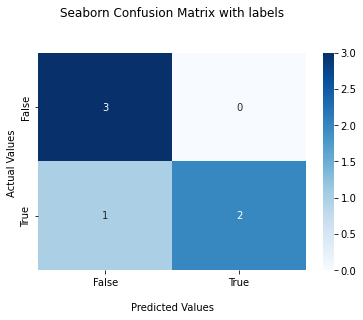

In [191]:
arr11 = np.array([0,0,0,0,0,0])
arr22 = np.array([1,1,1,1,1,1])
assert calc_recall(arr11, arr22) == 0, "wrong recall"
arr1 = np.array([0,1,0,1,1,0])
arr2 = np.array([0,1,0,1,0,0])
assert calc_tp(arr1, arr2) == 2, 'wrong tp'
assert calc_fp(arr1, arr2) == 0, 'wrong fp'
assert calc_tn(arr1, arr2) == 3, 'wrong tn'
assert calc_fn(arr1, arr2) == 1, 'wrong fn'
assert np.all(calc_confusion_matrix(arr1, arr2) == np.array([[3, 0],[1, 2]])), 'wrong confusion matrix'
plot_confusion_matrix(arr1, arr2)

In [163]:
csv_valid = np.array(csv_valid, dtype=float)
y_true = csv_valid[:,1]
x_valid = csv_valid[:,:1]
y_pred = model.predict_proba(x_valid)[:,1]>0.645

In [164]:
def calculate_metrics(classifier, x, y):
    plt_arr1 = [[],[]]
    plt_arr2 = [[],[]]
    plt_arr3 = [[],[]]
    plt_arr4 = [[],[]]
    for treshold in range(1, 1000):
        i = treshold/1000
        y_pred = classifier.predict_proba(x)[:,1]>i
        plt_arr1[0].append(i)
        plt_arr1[1].append(calc_precision(y, y_pred))
        plt_arr2[0].append(i)
        plt_arr2[1].append(calc_recall(y, y_pred))
        plt_arr3[0].append(i)
        plt_arr3[1].append(calc_f1_measure(y, y_pred))
        plt_arr4[0].append(i)
        plt_arr4[1].append(calc_accuracy(y, y_pred))
    return plt_arr1, plt_arr2, plt_arr3, plt_arr4

In [165]:
def plot_metrics(model, x_valid, y_true):
    plt.figure()
    plt_a1, plt_a2, plt_a3, plt_a4 = calculate_metrics(model, x_valid, y_true)
    plt.plot(plt_a1[0], plt_a1[1], label="precision")
    plt.plot(plt_a2[0], plt_a2[1], label="recall")
    plt.plot(plt_a3[0], plt_a3[1], label="f1")
    for x in range(len(plt_a2[1])):
        if plt_a2[1][x] == 1:
            plt.scatter([plt_a2[0][x]], [1], label="best")
            print(x)
            break
    mn, mn_t = 0, 0
    for x in range(len(plt_a1[1])):
        if plt_a1[1][x] > mn:
            mn = plt_a1[1][x]
            mn_t = plt_a1[0][x]

    plt.scatter([mn_t], [mn], label='best1')
    plt.legend(loc="upper right")
    plt.figure()
    plt.plot(plt_a4[0], plt_a4[1], label="accuracy")
    plt.legend(loc="upper right")


0


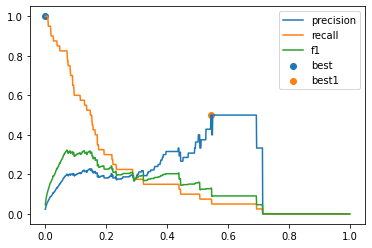

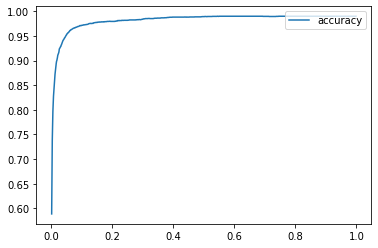

In [166]:
plot_metrics(model, x_valid, y_true)

In [167]:
print(calc_precision(y_true, y_pred))
print(calc_recall(y_true, y_pred))
print(calc_f1_measure(y_true, y_pred))
print(calc_accuracy(y_true, y_pred))

0.5
0.05
0.09090909090909091
0.99


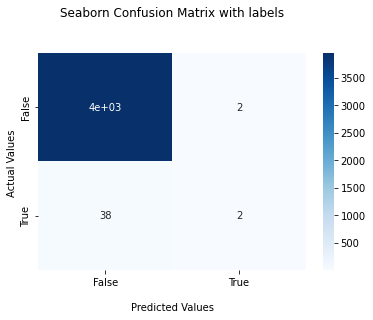

In [168]:
plot_confusion_matrix(y_true, y_pred)

# Quadratic classifier

In [169]:
x_quad_train = get_quadratic_features(x_train)

In [170]:
quad_model = SGDClassifier(loss='log')

In [171]:
quad_model.fit(x_quad_train, y_train)

SGDClassifier(loss='log')

0


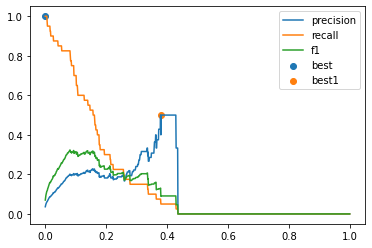

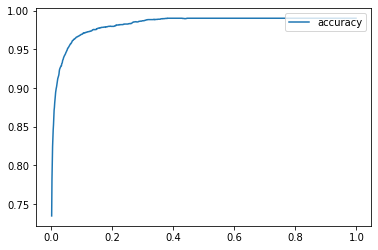

In [172]:
plot_metrics(quad_model, get_quadratic_features(x_valid), y_true)

In [173]:
quad_arr = quad_model.predict_proba(get_quadratic_features(x_valid))[:,1]>0.05

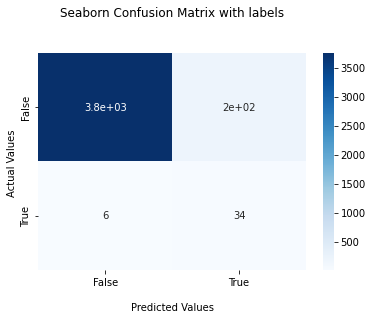

In [174]:
plot_confusion_matrix(y_true, quad_arr)

0


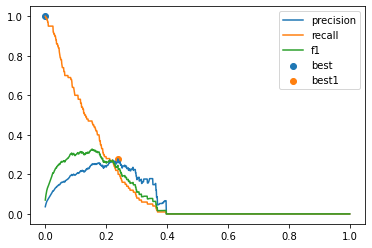

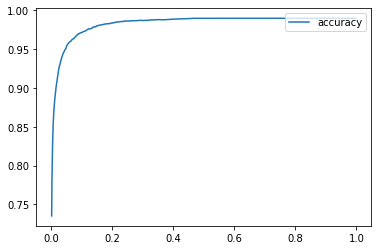

In [175]:
plot_metrics(quad_model, x_quad_train, y_train)

0


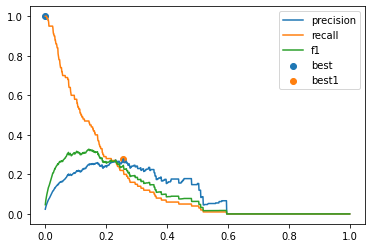

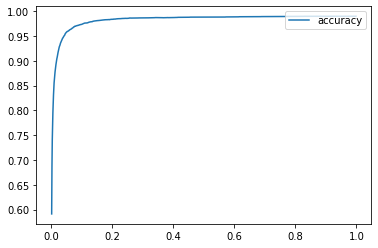

In [176]:
plot_metrics(model, x_train, y_train)

# Multiclass classifier

In [177]:
from sklearn.metrics import classification_report
from copy import copy

In [178]:
def multiclass_TP(y_true, y_pred) -> dict:
    """ Function to calculate True Positive of multiclass classifier """
    dictionary = {}
    for multi_class in np.unique(y_true):
        TP = 0
        for i in range(len(y_true)):
            if y_pred[i] == y_true[i] and y_true[i] == multi_class:
                TP += 1
        dictionary[multi_class] = TP
    return dictionary

def multiclass_FP(y_true, y_pred) -> dict:
    """ Function to calculate False Positive of multiclass classifier """
    dictionary = {}
    for multi_class in np.unique(y_true):
        FP = 0
        for i in range(len(y_true)):
            if y_pred[i] == multi_class and y_pred[i] != y_true[i]:
                FP += 1
        dictionary[multi_class] = FP
    return dictionary

def multiclass_FN(y_true, y_pred) -> dict:
    """ Function to calculate False Negative of multiclass classifier """
    dictionary = {}
    for multi_class in np.unique(y_true):
        FN = 0
        for i in range(len(y_true)):
            if y_true[i] == multi_class and y_pred[i] != y_true[i]:
                FN += 1
        dictionary[multi_class] = FN
    return dictionary

def multiclass_precision(y_true, y_pred) -> dict:
    """ Function to calculate Precision of multiclass classifier """
    dictionary = {}
    for multi_class in np.unique(y_true):
        TP = multiclass_TP(y_true, y_pred)[multi_class]
        FP = multiclass_FP(y_true, y_pred)[multi_class]
        if TP+FP == 0:
            dictionary[multi_class] = 0
        else:
            dictionary[multi_class] = TP/(TP+FP)
    return dictionary

def multiclass_recall(y_true, y_pred) -> dict:
    """ Function to calculate Recall of multiclass classifier """
    dictionary = {}
    for multi_class in np.unique(y_true):
        TP = multiclass_TP(y_true, y_pred)[multi_class]
        FN = multiclass_FN(y_true, y_pred)[multi_class]
        if TP+FN == 0:
            dictionary[multi_class] = 0
        else:
            dictionary[multi_class] = TP/(TP+FN)
    return dictionary
       
def multiclass_f1(y_true, y_pred) -> dict:
    """ Function to calculate F1 of multiclass classifier """
    dictionary = {}
    for multi_class in np.unique(y_true):
        Precision = multiclass_precision(y_true, y_pred)
        Recall = multiclass_recall(y_true, y_pred)
        if Precision[multi_class]+Recall[multi_class] == 0:
            dictionary[multi_class] = 0
        else:
            dictionary[multi_class] = 2*Precision[multi_class]*Recall[multi_class]/\
            (Precision[multi_class]+Recall[multi_class])
    return dictionary

def multiclass_accuracy(y_true, y_pred) -> float:
    """ Function to calculate Accuracy of multiclass classifier """
    TP = 0
    for x in range(len(y_true)):
        if y_true[x] == y_pred[x]:
            TP += 1
    return TP/y_true.shape[0]

def print_multiclass_metrics(y_true, y_pred) -> None:
    """ Function to print most common metrics of multiclass classifier """
    for class_, score in multiclass_precision(multiclass_arr_test[:,1], multi_y_pred).items():
        print(f"Precision for class {int(class_)}: {score}")
    print()
    for class_, score in multiclass_recall(multiclass_arr_test[:,1], multi_y_pred).items():
        print(f"Recall for class {int(class_)}: {score}")
    print()
    for class_, score in multiclass_f1(multiclass_arr_test[:,1], multi_y_pred).items():
        print(f"F1 for class {int(class_)}: {score}")
    print(f'\nAccuracy: {multiclass_accuracy(y_true, y_pred)}')

In [179]:
def multi_pred(model, x, treshold1, treshold2):
    """ Prediction function """
    multiclass_ans = np.empty((x.shape[0], ), dtype=int)
    model1_pred = model[0].predict_proba(x)
    model2_pred = model[1].predict_proba(x)
    for i in range(len(model1_pred)):
        if model1_pred[i][1] > treshold1:
            multiclass_ans[i] = 1
        else:
            if model2_pred[i][1] > treshold2:
                multiclass_ans[i] = 2
            else:
                multiclass_ans[i] = 0
    return multiclass_ans

In [180]:
multiclass_arr = file_opener("task_multiclass.csv", 'r')
multiclass_arr = np.array(multiclass_arr, dtype=float)
multiclass_arr_test = file_opener("task_multiclass_test.csv", 'r')
multiclass_arr_test = np.array(multiclass_arr_test, dtype=float)

In [181]:
multiclass_arr1 = copy(multiclass_arr)
for x in range(len(multiclass_arr1)):
    if multiclass_arr[x][1] == 2.0:
        multiclass_arr1[x][1] = 0
multiclass_arr2 = copy(multiclass_arr)
for x in range(len(multiclass_arr2)):
    if multiclass_arr[x][1] == 1.0:
        multiclass_arr2[x][1] = 0
    elif multiclass_arr[x][1] == 2.0:
        multiclass_arr1[x][1] = 1
multi_x1_train = multiclass_arr1[:,0].reshape(multiclass_arr1.shape[0], 1)
multi_x2_train = multiclass_arr2[:,0].reshape(multiclass_arr2.shape[0], 1)
multi_y1_train = multiclass_arr1[:,1]
multi_y2_train = multiclass_arr2[:,1]
print(multi_x1_train.shape)
print(multi_x2_train.shape)
print(multi_y1_train.shape)
print(multi_y2_train.shape)

(4040, 1)
(4040, 1)
(4040,)
(4040,)


In [182]:
multi_model1 = SGDClassifier(loss='log')
multi_model2 = SGDClassifier(loss='log')
multi_model1.fit(multi_x1_train, multi_y1_train)
multi_model2.fit(multi_x2_train, multi_y2_train)

SGDClassifier(loss='log')

In [183]:
multi_y_pred = multi_pred((multi_model1, multi_model2), multiclass_arr_test[:,:1], 0.09, 0.017)

In [184]:
multiclass_accuracy(multiclass_arr_test[:,1], multi_y_pred)

0.9517326732673267

# Metrics for multiclass classification #

### Implemented with functions: ###

In [185]:
print_multiclass_metrics(multiclass_arr_test[:,1], multi_y_pred)

Precision for class 0: 0.9895968790637191
Precision for class 1: 0.0
Precision for class 2: 0.29850746268656714

Recall for class 0: 0.9608585858585859
Recall for class 1: 0.0
Recall for class 2: 1.0

F1 for class 0: 0.9750160153747598
F1 for class 1: 0
F1 for class 2: 0.45977011494252873

Accuracy: 0.9517326732673267


### Sklearn classification report: ###

In [186]:
print(classification_report(multiclass_arr_test[:,1], multi_y_pred, target_names=None))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      3960
         1.0       0.00      0.00      0.00        40
         2.0       0.30      1.00      0.46        40

    accuracy                           0.95      4040
   macro avg       0.43      0.65      0.48      4040
weighted avg       0.97      0.95      0.96      4040

